Implement `regularized linear regression` and use it to study models with different `bias-variance properties`.

# Regularized Linear Regression

Implement `regularized linear regression` to predict the amount of water flowing out of a dam using the change of water level in a reservoir

In [1]:
import numpy  as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy
import scipy.optimize as opt
import scipy.io as sio
from scipy.io import loadmat

%matplotlib inline

###### load data

This dataset is divided into three parts:

- A **training** set that your model will learn on: `X`, `y`
- A **cross validation** set for determining the regularization parameter: `Xval`, `yval`
- A **test** set for evaluating performance. These are “unseen” examples which your model did not see during training: `Xtest`, `ytest`

In [2]:
path = "dataset/ex5data1.mat"
ori_data = sio.loadmat(path)
print("ori_data.keys() :", ori_data.keys())

ori_data.keys() : dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])


In [3]:
X_ori = ori_data['X']
y_ori = ori_data['y']

X_train = ori_data['X']
y_train = ori_data['y'].reshape((-1,))

X_cv = ori_data['Xval']
y_cv = ori_data['yval'].reshape((-1,))

X_test = ori_data["Xtest"]
y_test = ori_data["ytest"].reshape((-1,))

sample = X_train.shape[0]

## Plot Original Data

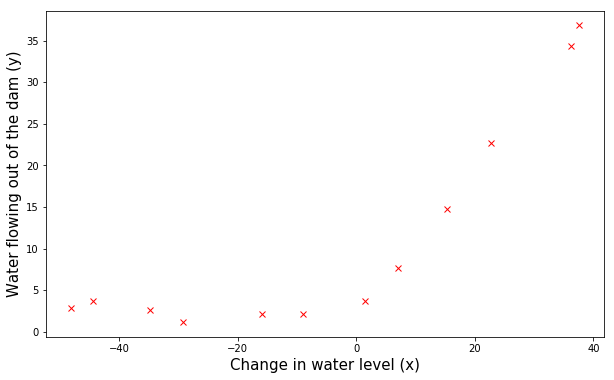

In [4]:
def plot_ori_data(X_ori, y_ori, label_x, label_y, axes=None):
    if axes == None:
        axes = plt.gca()

    axes.plot(X_ori, y_ori, "rx", markersize=6)
        
    axes.set_xlabel(label_x, fontsize=15)
    axes.set_ylabel(label_y, fontsize=15)

plt.figure(figsize=(10,6))
plot_ori_data(X_ori, y_ori, 'Change in water level (x)', 'Water flowing out of the dam (y)', plt.gca())

###### Regularized linear regression - Cost Function

$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right)^2 \right) + \frac{\lambda}{2m} \left( \sum_{j=1}^n \theta_j^2 \right)$$

where **$\lambda$ is a regularization parameter** which `controls the degree of regularization` (thus, help preventing overfitting). The regularization term puts `a penalty` on the overall cost J. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. 
**Note that you should not regularize the $\theta_0$ term.**

Run your cost function using `theta` initialized at `[1, 1]`. You should expect to see an output of `303.993`.

In [5]:
def hypothesis(theta, X):
    hyp = X @ theta    # np.dot(X, theta)
    return hyp

In [6]:
def cost_function(theta, X, y, lamd=0):
    m = y.shape[0]
    
    err = hypothesis(theta, X) - y    # (m, )
    cost = np.mean(np.square(err)) / 2
    
    reg_item = lamd * np.sum(np.power(theta[1:], 2)) / (2 * m)
    
    cost_reg = cost + reg_item
    
    return cost_reg

When you are finished, the next cell will run your cost function using `theta` initialized at `[1, 1]`. You should expect to see an output of 303.993.

In [7]:
X_train_bias = np.insert(X_train, 0, 1, axis=1)
X_cv_bias    = np.insert(X_cv, 0, 1, axis=1)
theta_init_ones = np.ones((X_train_bias.shape[1],))

In [8]:
Lamd = 0
cost = cost_function(theta_init_ones, X_train_bias, y_train, lamd=Lamd)
print("Cost : %.3f" % cost)

Cost : 303.952


In [9]:
Lamd = 1
cost = cost_function(theta_init_ones, X_train_bias, y_train, lamd=Lamd)
print("Cost : %.3f" % cost)

Cost : 303.993


###### Regularized linear regression - Gradient Descent

$$
\begin{align}
& \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} & \qquad \text{for } j = 0 \\
& \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j & \qquad \text{for } j \ge 1
\end{align}
$$

Run your gradient function using theta initialized at `[1, 1]`. You should expect to see a gradient of `[-15.30, 598.250]`.

In [10]:
def gradient(theta, X, y, lamd=0):
    m = y.shape[0]
    
    err = hypothesis(theta, X) - y
    grad = (X.T @ err) / m
    
    reg_theta = lamd * theta[1:] / m
    reg_item = np.r_[[0], reg_theta]
    
    grad_reg = grad + reg_item
        
    return grad_reg

When you are finished, use the next cell to  run your gradient function using theta initialized at `[1, 1]`. You should expect to see a gradient of `[-15.30, 598.250]`.

In [11]:
grad = gradient(theta_init_ones, X_train_bias, y_train, lamd=Lamd)
print(grad)

[-15.30301567 598.25074417]


## optimize

In this part, we `set regularization parameter` $\lambda$ `to zero`. **Because our current implementation of linear regression is trying to fit a 2-dimensional $\theta$, regularization will not be incredibly helpful for a $\theta$ of such low dimension**.

Finally, the code in the next cell should also plot the best fit line, which should look like the figure below. 

![](Figures/linear_fit.png)

The best fit line tells us that `the model is not a good fit to the data` because **the data has a non-linear pattern**.

In [12]:
def scipy_opt_minimize(theta, X, y, lamd=0):
    res = opt.minimize(
        fun    = cost_function,
        x0     = theta,
        args   = (X, y, lamd),
        jac    = gradient,
        method = 'CG'
    )
    
    return res

In [13]:
Lamd = 0
res_lamd_0 = scipy_opt_minimize(theta_init_ones, X_train_bias, y_train, lamd=Lamd)

In [14]:
res_lamd_0

     fun: 22.373906495116028
     jac: array([ 3.71382085e-06, -1.28328502e-07])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 18
    njev: 28
  status: 0
 success: True
       x: array([13.08790734,  0.36777925])

In [15]:
Lamd = 1
res_lamd_1 = scipy_opt_minimize(theta_init_ones, X_train_bias, y_train, lamd=Lamd)

In [16]:
res_lamd_1

     fun: 22.379541822947473
     jac: array([ 3.73935436e-06, -1.29444073e-07])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 18
    njev: 28
  status: 0
 success: True
       x: array([13.08771802,  0.36774202])

## Fitting linear regression

In [17]:
def do_predict(theta, X):
    X_range = np.linspace(X.min(), X.max(), 100).reshape((-1,1))
    X_pred = np.insert(X_range, 0, 1, axis=1)
    y_pred = hypothesis(theta, X_pred)
    
    return X_pred, y_pred

In [18]:
def plot_fit_curve(X_pred, y_pred, theta, axes=None):
    if axes == None:
        axes = plt.gca()
    axes.plot(X_pred, y_pred, 'b--')

In [19]:
X_pred, y_pred_lamd_0 = do_predict(res_lamd_0.x, X_train)
X_pred, y_pred_lamd_1 = do_predict(res_lamd_1.x, X_train)

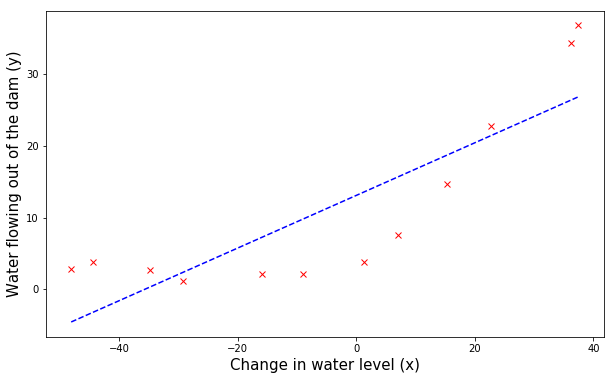

In [20]:
plt.figure(figsize=(10,6))
plot_ori_data(X_ori, y_ori, 'Change in water level (x)', 'Water flowing out of the dam (y)', axes=plt.gca())
plot_fit_curve(X_pred[:,1], y_pred_lamd_0, res_lamd_0.x, axes=plt.gca())

The best fit line tells us that `the model is not a good fit to the data` because **the data has a non-linear pattern**.

# Bias-variance

+ **high bias** : not comple enough for the data and tend to underfit
+ **high variance** : overfit to the training data

> Plot `training and test errors` on a **learning curve** to `diagnose bias-variance problems`

## Learning Curves

Recall that **a learning curves** `plots traning and cross validation error` as a function of training set size.

We need a training and cross validation set error for **different training set sizes**.

**Traing the $\theta$ parameters with $\lambda\$=0**. In particular, note that the training error does not include the regularization term

$$ J_{\text{train_k}} = \frac{1}{2k} \left[ \sum_{i=1}^k \left(h_\theta \left( x^{(i)} \right) - y^{(i)} \right)^2 \right] $$

$$ J_{\text{cv}} = \frac{1}{2m} \left[ \sum_{i=1}^m \left(h_\theta \left( x^{(i)} \right) - y^{(i)} \right)^2 \right] $$

However, for **the cross validation error**, you should **compute it over `the entire cross validation set`**.

In [21]:
def plot_learning_curves(X_train, y_train, X_cv, y_cv, Lamd=0, axes=None):
    if axes == None:
        axes = plt.gca()
    
    sample = y_train.shape[0]
    
    error_train = np.zeros((sample,1))
    error_cv    = np.zeros((sample,1))
    
    for i in np.arange(sample):
        theta = np.zeros((X_train[:i+1].shape[1],))
        res = scipy_opt_minimize(theta, X_train[:i+1], y_train[:i+1], lamd=Lamd)
        
        error_train[i] = cost_function(res.x, X_train[:i+1], y_train[:i+1])
        error_cv[i]    = cost_function(res.x, X_cv, y_cv)

    axes.plot(np.arange(len(error_train))+1, error_train, label='error_train')
    axes.plot(np.arange(len(error_cv))+1, error_cv, '--', label='error_cv')
    axes.set_title('Learning curve for linear regression')
    axes.set_xlabel('Number of training examples')
    axes.set_ylabel('Error')
    axes.legend()    

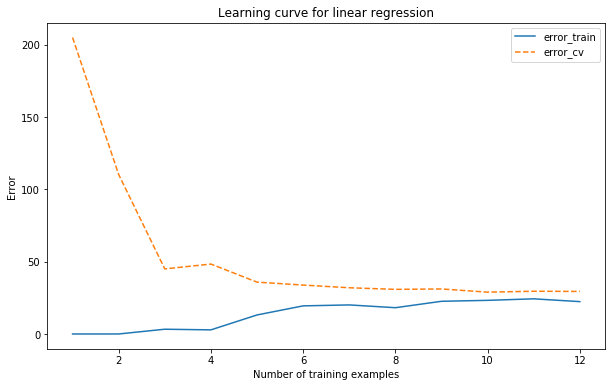

In [22]:
plt.figure(figsize=(10,6))
plot_learning_curves(X_train_bias, y_train, X_cv_bias, y_cv, axes=plt.gca())

You can observe that **both the train error and cross validation error are `high`** `when the number of training examples is increassed`

This reflects **a high bias problem** in the model -- `the linear regression model is too simple and is unable to fit our dataset well`.

# Polynomial regression

The problem with our `linear model` was that it was `too simple for the data` and `resulted in underfitting (high bias)`.

## feature normalization

For this part of the exercise, you will be using `a polynomial of degree 8.` It turns out that if we run the training directly on the projected data, will not work well as the features would be badly scaled (e.g., an example with $x = 40$ will now have a feature $x_8 = 40^8 = 6.5 \times 10^{12}$). Therefore, you will need to use **`feature normalization`**.

In [23]:
mu_train  = 0
std_train = 0

def feature_normalization_train(data):
    global mu_train, std_train
    
    mu_train = data[:,1:].mean(axis=0)
    std_train = data[:,1:].std(axis=0)
    data_norm = (data[:,1:] - mu_train) / std_train
    data_norm = np.insert(data_norm, 0, 1, axis=1)
        
    return data_norm

def feature_normalization_other(data):
    data_norm = (data[:,1:] - mu_train) / std_train
    data_norm = np.insert(data_norm, 0, 1, axis=1)
        
    return data_norm

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
def sk_scaler(data):
    scaler = StandardScaler()
    scaler.fit(data)

    return scaler

## poly noimal feature

$$
\begin{align}
h_\theta(x)  &= \theta_0 + \theta_1 \times (\text{waterLevel}) + \theta_2 \times (\text{waterLevel})^2 + \cdots + \theta_p \times (\text{waterLevel})^p \\
& = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_p x_p
\end{align}
$$

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
def poly_nomial_feature(degree, train_data, cv_data, test_data):
    poly = PolynomialFeatures(degree, include_bias=False)
    train_poly = poly.fit_transform(train_data)
    cv_poly    = poly.fit_transform(cv_data)
    test_poly  = poly.fit_transform(test_data)
    
    return poly, train_poly, cv_poly, test_poly

###### do poly noimal feature

In [28]:
poly, X_train_poly, X_cv_poly, X_test_poly = poly_nomial_feature(6, X_train, X_cv, X_test)

In [29]:
XX_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names())
XX_df.head()

,x0,x0^2,x0^3,x0^4,x0^5,x0^6
0,-15.936758,253.980260,-4047.621971,6.450597e+04,-1.028016e+06,1.638324e+07
1,-29.152979,849.896197,-24777.006175,7.223235e+05,-2.105788e+07,6.139000e+08
2,36.189549,1309.683430,47396.852168,1.715271e+06,6.207487e+07,2.246462e+09
3,37.492187,1405.664111,52701.422173,1.975892e+06,7.408050e+07,2.777440e+09
4,-48.058829,2309.651088,-110999.127750,5.334488e+06,-2.563693e+08,1.232081e+10


###### do normalize poly-feature

In [30]:
scaler = sk_scaler(X_train_poly)
X_train_poly_norm = np.insert(scaler.transform(X_train_poly), 0, 1, axis=1)
X_cv_poly_norm    = np.insert(scaler.transform(X_cv_poly), 0, 1, axis=1)
X_test_poly_norm  = np.insert(scaler.transform(X_test_poly), 0, 1, axis=1)

In [31]:
XX_df = pd.DataFrame(X_train_poly_norm)
XX_df.head()

,0,1,2,3,4,5,6
0,1.0,-0.378244,-0.788662,0.190329,-0.737591,0.320252,-0.617152
1,1.0,-0.838920,0.001314,-0.258962,-0.341565,0.097549,-0.455197
2,1.0,1.438717,0.610832,1.305341,0.256220,1.021863,-0.012696
3,1.0,1.484123,0.738068,1.420312,0.413122,1.155348,0.131224
4,1.0,-1.497919,1.936440,-2.127747,2.435101,-2.518767,2.717922


###### learning $\theta$ by $\lambda$ = 0
> Keep in mind that even though we have `polynomial terms` in our feature vector, we are still solving **a linear regression optimization problem**.

In [32]:
Lamd = 0
theta_init_ones_poly = np.ones((X_train_poly_norm.shape[1],))

res_lamd_0_poly = scipy_opt_minimize(theta_init_ones_poly, X_train_poly_norm, y_train, lamd=Lamd)

In [33]:
X_train

array([[-15.93675813],
       [-29.15297922],
       [ 36.18954863],
       [ 37.49218733],
       [-48.05882945],
       [ -8.94145794],
       [ 15.30779289],
       [-34.70626581],
       [  1.38915437],
       [-44.38375985],
       [  7.01350208],
       [ 22.76274892]])

In [34]:
res_lamd_0_poly

     fun: 0.19805294321823
     jac: array([-5.25027879e-07, -2.44871742e-06,  2.02849467e-06,  6.44546379e-07,
       -4.80153334e-09,  1.92217605e-06, -1.04964433e-06])
 message: 'Optimization terminated successfully.'
    nfev: 328
     nit: 170
    njev: 328
  status: 0
 success: True
       x: array([ 11.2175888 ,  10.88681481,  12.86210046,  10.28471971,
        -4.2012076 , -11.41374114,  -4.90336575])

### do predict

In [35]:
def do_predict_poly(theta, X):
    X_range = np.linspace(X.min()-30, X.max()+20, 100).reshape((-1,1))
    X_poly = poly.fit_transform(X_range)
    X_poly_norm = np.insert(scaler.transform(X_poly), 0, 1, axis=1)
    y_pred = hypothesis(theta, X_poly_norm)
    
    return X_poly, y_pred

In [36]:
X_pred, y_pred = do_predict_poly(res_lamd_0_poly.x, X_train)

In [37]:
XX_df = pd.DataFrame(X_pred, columns=poly.get_feature_names())
XX_df.head()

,x0,x0^2,x0^3,x0^4,x0^5,x0^6
0,-78.058829,6093.180856,-475626.565224,3.712685e+07,-2.898079e+09,2.262206e+11
1,-76.689627,5881.298930,-451034.622741,3.458968e+07,-2.652669e+09,2.034322e+11
2,-75.320425,5673.166433,-427305.307258,3.218482e+07,-2.424174e+09,1.825898e+11
3,-73.951223,5468.783366,-404423.217595,2.990759e+07,-2.211703e+09,1.635581e+11
4,-72.582021,5268.149728,-382372.952572,2.775340e+07,-2.014398e+09,1.462091e+11


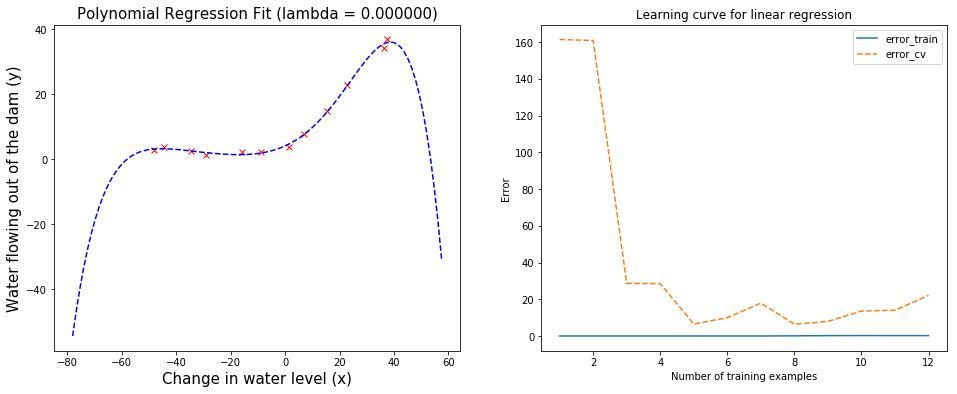

In [38]:
fig, axes = plt.subplots(1, 2, figsize=((16, 6)))
for i in range(2):
    axes_i = axes.flatten()[i]
    
    if i == 0:
        plot_ori_data(X_ori, y_ori, 'Change in water level (x)', 'Water flowing out of the dam (y)', axes_i)
        plot_fit_curve(X_pred[:,0], y_pred, res_lamd_0_poly.x, axes_i)
        axes_i.set_title ('Polynomial Regression Fit (lambda = {:f})'.format(0.0), fontsize=15)
    elif i == 1:
        plot_learning_curves(X_train_poly_norm, y_train, X_cv_poly_norm, y_cv, axes=axes_i)

###### $\lambda$ = 0

You should see that the polynomial fit is able to follow the datapoints very well, thus, obtaining **`a low training error`**. The figure on the right shows that `the training error essentially stays zero for all numbers of training samples`. However, the polynomial fit is very complex and even drops off at the extremes. This is an indicator that the polynomial regression model is **`overfitting the training data`** and will `not generalize well`.

To better understand the problems with the unregularized ($\lambda = 0$) model, you can see that the learning curve  shows the same effect where **the training error is low, but the cross validation error is high**. There is **`a gap between the training and cross validation errors`**, indicating **`a high variance problem`**.

One way to **`combat the overfitting (high-variance) problem`** is to **`add regularization to the model`**.

In [39]:
Lamd = 1
theta_init_ones_poly = np.ones((X_train_poly_norm.shape[1],))

res_lamd_1_poly = scipy_opt_minimize(theta_init_ones_poly, X_train_poly_norm, y_train, lamd=Lamd)

In [40]:
X_pred, y_pred = do_predict_poly(res_lamd_1_poly.x, X_train)

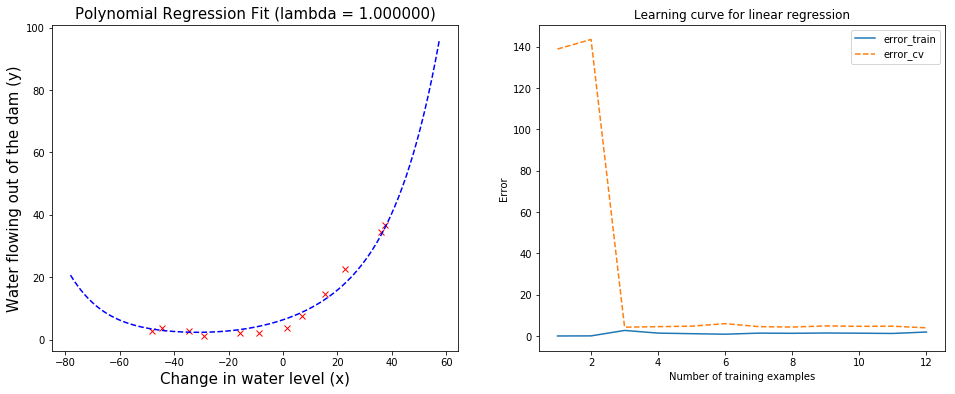

In [41]:
fig, axes = plt.subplots(1, 2, figsize=((16, 6)))
for i in range(2):
    axes_i = axes.flatten()[i]
    
    if i == 0:
        plot_ori_data(X_ori, y_ori, 'Change in water level (x)', 'Water flowing out of the dam (y)', axes_i)
        plot_fit_curve(X_pred[:,0], y_pred, res_lamd_1_poly.x, axes_i)
        axes_i.set_title ('Polynomial Regression Fit (lambda = {:f})'.format(1.0), fontsize=15)
    elif i == 1:
        plot_learning_curves(X_train_poly_norm, y_train, X_cv_poly_norm, y_cv, axes=axes_i, Lamd=1)

###### $\lambda$ = 1

You should see a polynomial fit that follows the data trend well (left) and a learning curve (right) showing that **`both the cross validation and training error converge to a relatively low value`**. This shows the $\lambda = 1$ regularized polynomial regression model **`does not have the high-bias or high-variance problems`**. In effect, it achieves a good trade-off between bias and variance.

In [42]:
Lamd = 100
theta_init_ones_poly = np.ones((X_train_poly_norm.shape[1],))

res_lamd_100_poly = scipy_opt_minimize(theta_init_ones_poly, X_train_poly_norm, y_train, lamd=Lamd)

In [43]:
X_pred, y_pred = do_predict_poly(res_lamd_100_poly.x, X_train)

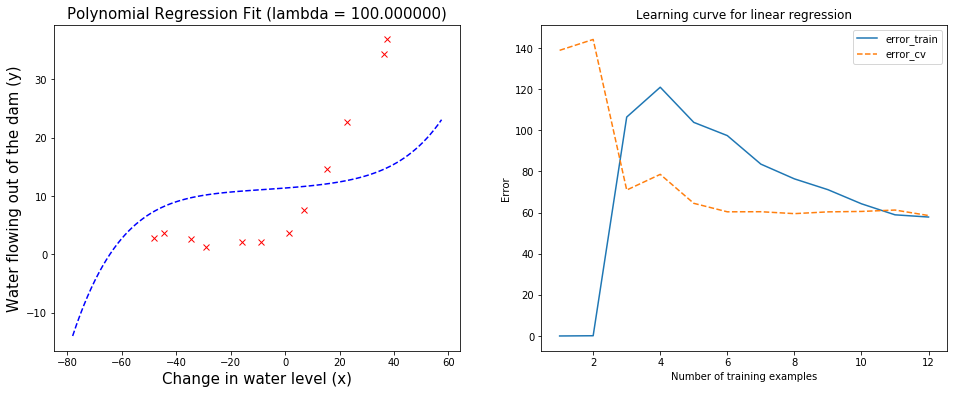

In [44]:
fig, axes = plt.subplots(1, 2, figsize=((16, 6)))
for i in range(2):
    axes_i = axes.flatten()[i]
    
    if i == 0:
        plot_ori_data(X_ori, y_ori, 'Change in water level (x)', 'Water flowing out of the dam (y)', axes_i)
        plot_fit_curve(X_pred[:,0], y_pred, res_lamd_100_poly.x, axes_i)
        axes_i.set_title ('Polynomial Regression Fit (lambda = {:f})'.format(100.0), fontsize=15)
    elif i == 1:
        plot_learning_curves(X_train_poly_norm, y_train, X_cv_poly_norm, y_cv, axes=axes_i, Lamd=100)

###### $\lambda$ = 100

In this case, there is **`too much regularization`** and the model is unable to fit the training data. **`High bias`**

## Selecting $\lambda$ using a cross validation set

In [45]:
lamd_range = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
train_cost, cv_cost = [], []
test_cost = []

In [46]:
for Lamd in lamd_range:
    theta_init_ones_poly = np.ones((X_train_poly_norm.shape[1],))
    res = scipy_opt_minimize(theta_init_ones_poly, X_train_poly_norm, y_train, lamd=Lamd)
    
    train_cost.append(cost_function(res.x, X_train_poly_norm, y_train))
    cv_cost.append(cost_function(res.x, X_cv_poly_norm, y_cv))
    test_cost.append(cost_function(res.x, X_test_poly_norm, y_test))

train_cost = np.array(train_cost)
cv_cost = np.array(cv_cost)
test_cost = np.array(test_cost)

lambda		Train Error	Validation Error	Test Error

 0.000000	0.198053	22.118920		18.680500

 0.001000	0.199037	19.797546		17.087743

 0.003000	0.203432	17.276773		15.368135

 0.010000	0.224046	13.765380		13.027882

 0.030000	0.282881	10.426900		10.812814

 0.100000	0.449613	7.012358		7.779879

 0.300000	0.878637	4.796847		4.684120

 1.000000	1.911364	3.933506		3.098759

 3.000000	4.497521	3.540889		4.397589

 10.000000	15.240871	10.596092		17.234173



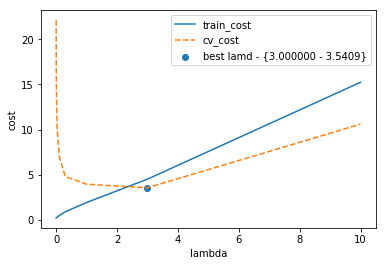

In [47]:
print('lambda\t\tTrain Error\tValidation Error\tTest Error\n')
for i in np.arange(len(lamd_range)):
    print(' {:f}\t{:f}\t{:f}\t\t{:f}\n'.format(lamd_range[i], train_cost[i], cv_cost[i], test_cost[i]))
    
plt.plot(lamd_range, train_cost, label='train_cost')
plt.plot(lamd_range, cv_cost, '--', label='cv_cost')
#plt.plot(lamd_range, test_cost, label='test_cost')

ind = np.where(cv_cost == np.amin(cv_cost))
optLambda = lamd_range[ind]
plt.scatter(optLambda, cv_cost[ind], label="best lamd - {%f - %0.4f}" % (optLambda, cv_cost[ind]))
plt.legend()
plt.xlabel('lambda')
plt.ylabel('cost')
plt.show()

In this figure, we can see that the best value of $\lambda$ is around 3. 

Due to randomness in the training and validation splits of the dataset, the cross validation error can sometimes be lower than the training error.

## Computing test set error
In our cross validation, we obtained a test error of `3.8599` for $\lambda = 3$.

In [48]:
res = scipy_opt_minimize(theta_init_ones_poly, X_train_poly_norm, y_train, lamd=3)

In [49]:
cost_function(res.x, X_test_poly_norm, y_test)

4.397589018879664

##  Plotting learning curves with randomly selected examples

In practice, especially for `small training sets`, when you plot learning curves to debug your algorithms, it is often helpful to average across multiple sets of randomly selected examples to determine the training error and cross validation error.

Concretely, to determine the training error and cross validation error for $i$ examples, you should first randomly select $i$ examples from the training set and $i$ examples from the cross validation set. You will then learn the parameters $\theta$ using the randomly chosen training set and evaluate the parameters $\theta$ on the randomly chosen training set and cross validation set. The above steps should then be `repeated multiple times` (say 50) and the averaged error should be used to determine the training error and cross validation error for $i$ examples.

In [50]:
def plot_learning_curves_random(lamd=0, times=100):
    error_train_rand = np.zeros((sample, times))
    error_cv_rand    = np.zeros((sample, times))
    
    for i in range(1, sample+1):
        for t in range(times):
            rand_sample_train = np.random.permutation(X_train_poly_norm.shape[0])
            rand_sample_train = rand_sample_train[:i]
            
            rand_sample_cv    = np.random.permutation(X_cv_poly_norm.shape[0])
            rand_sample_cv    = rand_sample_cv[:i]
            
            X_train_poly_norm_rand   = X_train_poly_norm[rand_sample_train,:]
            y_train_rand             = y_train[rand_sample_train]
            X_cv_poly_norm_rand      = X_cv_poly_norm[rand_sample_cv,:]
            y_cv_rand                = y_cv[rand_sample_cv]
            
            theta_rand = np.ones((X_train_poly_norm_rand.shape[1],))
            res = scipy_opt_minimize(theta_rand, X_train_poly_norm_rand, y_train_rand, lamd)
            theta = res.x
            
            error_train_rand[i-1,t] = cost_function(theta, X_train_poly_norm_rand, y_train_rand)
            error_cv_rand[i-1,t]    = cost_function(theta, X_cv_poly_norm_rand,   y_cv_rand)
        
    error_train = np.mean(error_train_rand, axis=1)
    error_cv    = np.mean(error_cv_rand, axis=1)

    plt.plot(np.arange(len(error_train))+1, error_train, label='Training error')
    plt.plot(np.arange(len(error_cv))+1, error_cv, '--', label='Validation error')
    plt.title('Learning curve for linear regression')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.legend()   
    
    print('Training Examples\tTrain Error\t\tValidation Error\n')
    for i in np.arange(sample):
        print(' {:f}\t\t{:f}\t\t{:f}\n'.format(i+1, error_train[i], error_cv[i]))

Training Examples	Train Error		Validation Error

 1.000000		0.000000		195.688208

 2.000000		0.004401		102.071928

 3.000000		0.017665		32.807798

 4.000000		0.030813		26.030391

 5.000000		0.050549		17.339099

 6.000000		0.078854		14.339228

 7.000000		0.109455		14.739492

 8.000000		0.148026		13.883105

 9.000000		0.170941		13.936846

 10.000000		0.183919		14.429258

 11.000000		0.205556		13.918138

 12.000000		0.224031		13.200509



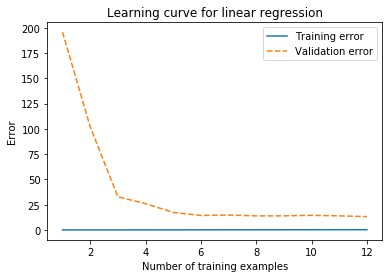

In [51]:
plot_learning_curves_random(0.01)

Training Examples	Train Error		Validation Error

 1.000000		0.000000		181.035196

 2.000000		7.343877		100.666568

 3.000000		11.618485		41.262407

 4.000000		9.161488		43.571457

 5.000000		9.132814		27.524302

 6.000000		7.620595		22.272467

 7.000000		7.228114		13.073387

 8.000000		6.670246		9.335529

 9.000000		6.011157		6.264556

 10.000000		5.309799		4.301669

 11.000000		4.923078		3.942752

 12.000000		4.497521		3.470559



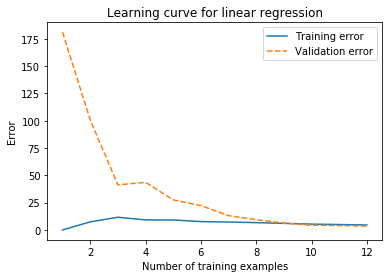

In [52]:
plot_learning_curves_random(3)